# Business understanding

Airbnb is an American vacation rental online marketplace company, it lets people rent their properties, rooms, or share their rooms to guests. This notebook is an effort to interpret the Airbnb, Boston and Seattle datasets from Kaggle and answer few business questions.

### Business questions:
#### 1: What time of the year has the most bookings?
#### 2: What months has the highest rental pricing?
#### 3: What features influence pricing?
#### 4: Create a model to predict rental price.

# Data understanding

We start by importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

Then we read all the files

In [2]:
# Reading Boston datasets
Bos_cal = pd.read_csv("Boston calendar.csv")
Bos_lis = pd.read_csv("Boston listings.csv")
Bos_rev = pd.read_csv("Boston reviews.csv")

# Reading Seattle datasets
Sea_cal = pd.read_csv("Seattle calendar.csv")
Sea_lis = pd.read_csv("Seattle listings.csv")
Sea_rev = pd.read_csv("Seattle reviews.csv")

In [3]:
# These lines are for setting the dataset display size
pd.set_option("max_columns", 100)
pd.set_option("max_rows", 200)
pd.set_option("min_rows", 30)

Now we want to know what the datasets look like

We will start with Boston's datasets

In [4]:
Bos_cal.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [5]:
Bos_cal.shape

(1308890, 4)

In [6]:
Bos_lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [7]:
Bos_lis.shape

(3585, 95)

In [8]:
Bos_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [9]:
Bos_rev.shape

(68275, 6)

Then Seattle's

In [10]:
Sea_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [11]:
Sea_cal.shape

(1393570, 4)

In [12]:
Sea_lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [13]:
Sea_lis.shape

(3818, 92)

In [14]:
Sea_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [15]:
Sea_rev.shape

(84849, 6)

Since we will be merging Boston's datasets with Seattle's, then we will explore the dataset's more when we merge them together in the "Data prepatation" section.

# Data preparation

In [16]:
# This line is used to make the font size in the plots bigger
plt.rcParams['font.size'] = 14
# And this one for the figure size
plt.rcParams['figure.figsize'] = 8, 6

Now we want to check that the datasets share the same columns before we merge.

In [17]:
list(set(Bos_cal) - set(Sea_cal))

[]

In [18]:
list(set(Bos_lis) - set(Sea_lis))

['house_rules', 'interaction', 'access']

In [19]:
list(set(Bos_rev) - set(Sea_rev))

[]

As we see here, the Seattle listings dataset is missing 3 columns from the Boston's dataset, and I am not intrested in using these for solving any of my questions so we'll just drop them from Boston's dataset. 

In [20]:
Bos_lis.drop(columns=['interaction', 'access', 'house_rules'], inplace=True)

Then we make sure that the columns has the same types.

In [21]:
def checkTypes(df1, df2):
    for col in df1.columns:
        if df1[col].dtypes != df2[col].dtypes:
            print('{}, {} type: {}, {} type: {}'.
                  format(col, 'df1', df1[col].dtypes, 'df2', df2[col].dtypes))

In [22]:
print('cal datasets:')
checkTypes(Bos_cal, Sea_cal)
print('\nlis datasets:')
checkTypes(Bos_lis, Sea_lis)
print('\nrev datasets:')
checkTypes(Bos_rev, Sea_rev)

cal datasets:

lis datasets:
host_listings_count, df1 type: int64, df2 type: float64
host_total_listings_count, df1 type: int64, df2 type: float64
neighbourhood_group_cleansed, df1 type: float64, df2 type: object
has_availability, df1 type: float64, df2 type: object
jurisdiction_names, df1 type: float64, df2 type: object

rev datasets:


We see that the lis datasets has columns with different types, so we will be changing one of them to match the other.

For the columns `host_listings_count` and `host_total_listings_count` we will change the `int` to `float` since it'll do no harm to the data. But `neighbourhood_group_cleansed`, `has_availability`, and `jurisdiction_names` we need more information first before we make a decision, so we will look how many non-null values in each dataset for this column.

In [23]:
print('neighbourhood_group_cleansed:')
print('Bos_lis:', Bos_lis.neighbourhood_group_cleansed.notna().sum())
print('Sea_lis:', Sea_lis.neighbourhood_group_cleansed.notna().sum())

print('\nhas_availability:')
print('Bos_lis:', Bos_lis.has_availability.notna().sum())
print('Sea_lis:', Sea_lis.has_availability.notna().sum())

print('\njurisdiction_names:')
print('Bos_lis:', Bos_lis.jurisdiction_names.notna().sum())
print('Sea_lis:', Sea_lis.jurisdiction_names.notna().sum())

neighbourhood_group_cleansed:
Bos_lis: 0
Sea_lis: 3818

has_availability:
Bos_lis: 0
Sea_lis: 3818

jurisdiction_names:
Bos_lis: 0
Sea_lis: 3818


Sweet, since the Boston's data for the the columns are NaN, we will change the Boston columns types to match Seattle's.

In [24]:
Bos_lis.host_listings_count = Bos_lis.host_listings_count.astype(float)
Bos_lis.host_total_listings_count = Bos_lis.host_total_listings_count.astype(float)
Bos_lis.neighbourhood_group_cleansed = Bos_lis.neighbourhood_group_cleansed.astype(object)
Bos_lis.has_availability = Bos_lis.has_availability.astype(object)
Bos_lis.jurisdiction_names = Bos_lis.jurisdiction_names.astype(object)

And now we merge

In [25]:
cal = pd.merge(Bos_cal, Sea_cal, how='outer', indicator=True)
# we'll add a column to identify the city of each row
d = {"left_only":"Boston", "right_only":"Seattle"}
cal["_merge"] = cal["_merge"].map(d)
cal.rename(columns={"_merge":"city"}, inplace=True)
cal.head()

,listing_id,date,available,price,city
0,12147973,2017-09-05,f,NaN,Boston
1,12147973,2017-09-04,f,NaN,Boston
2,12147973,2017-09-03,f,NaN,Boston
3,12147973,2017-09-02,f,NaN,Boston
4,12147973,2017-09-01,f,NaN,Boston


In [26]:
lis = pd.merge(Bos_lis, Sea_lis, how='outer')
lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...",https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1.0,1.0,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.286241,-71.134374,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,NaN,26,54,84

In [27]:
rev = pd.merge(Bos_rev, Sea_rev, how='outer')
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


Now we'll explore the new datasets

In [28]:
cal.shape

(2702460, 5)

In [29]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702460 entries, 0 to 2702459
Data columns (total 5 columns):
listing_id    int64
date          object
available     object
price         object
city          object
dtypes: int64(1), object(4)
memory usage: 123.7+ MB


In [30]:
lis.shape

(7403, 92)

In [31]:
lis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7403 entries, 0 to 7402
Data columns (total 92 columns):
id                                  7403 non-null int64
listing_url                         7403 non-null object
scrape_id                           7403 non-null int64
last_scraped                        7403 non-null object
name                                7403 non-null object
summary                             7083 non-null object
space                               5777 non-null object
description                         7403 non-null object
experiences_offered                 7403 non-null object
neighborhood_overview               4956 non-null object
notes                               3822 non-null object
transit                             5179 non-null object
thumbnail_url                       6484 non-null object
medium_url                          6484 non-null object
picture_url                         7403 non-null object
xl_picture_url                      6484

In [32]:
rev.shape

(153124, 6)

In [33]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153124 entries, 0 to 153123
Data columns (total 6 columns):
listing_id       153124 non-null int64
id               153124 non-null int64
date             153124 non-null object
reviewer_id      153124 non-null int64
reviewer_name    153124 non-null object
comments         153053 non-null object
dtypes: int64(3), object(3)
memory usage: 8.2+ MB


To answer the business questions we'll only need the `cal` and `lis` datasets so we'll be focusing only on them.

### We'll fix `cal` datafram first.

In `cal` dataframe we see that `date` and `price` columns has the wrong types so we'll be fixing them now.
For the `available` column, we'll change it to binary instead of string to make the exploration easier.

In [34]:
# This line will change the `date` column type to `datetime`
cal['date'] = pd.to_datetime(cal.date)

# This line will convert the `available` column to binary and its type to int
cal['available'] = cal['available'].replace({'f': 0, 't': 1}).astype(int)

Since the `price` will be changed for both `cal` and `lis` datasets, then we'll write a function to do it. 

In [35]:
def conv_price(df, column):
    '''
    DESCRIPTION:
    This function will remove the simples `,` and '$' from the given column then convert its type to float.
    
    INPUT:
    df - pandas dataframe
    column - the column you want to fix
    '''
    df[column] = df[column].str.replace(',', '')
    df[column] = df[column].str.replace('$', '')
    df[column] = df[column].astype(float)

and now we'll fix the `price` column for all dataframes.

In [36]:
conv_price(cal, 'price')
conv_price(lis, 'price')
conv_price(lis, 'cleaning_fee')

### Now we wrangle `lis` dataset, we start by removing unnecessary columns.

In [37]:
lis = lis[['id', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
           'host_total_listings_count', 'neighbourhood', 'city', 'property_type', 'room_type', 'accommodates',
           'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'cleaning_fee',
           'guests_included', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating',
           'cancellation_policy']]

#### Then we'll deal with missing data

In [38]:
lis.sample(1)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,neighbourhood,city,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,cancellation_policy
5779,1263470,within a few hours,88%,100%,f,4.0,Dunlap,Seattle,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",NaN,100.0,50.0,2,2,1125,6,77.0,strict


In [39]:
lis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7403 entries, 0 to 7402
Data columns (total 25 columns):
id                           7403 non-null int64
host_response_time           6409 non-null object
host_response_rate           6409 non-null object
host_acceptance_rate         6159 non-null object
host_is_superhost            7401 non-null object
host_total_listings_count    7401 non-null float64
neighbourhood                6444 non-null object
city                         7401 non-null object
property_type                7399 non-null object
room_type                    7403 non-null object
accommodates                 7403 non-null int64
bathrooms                    7373 non-null float64
bedrooms                     7387 non-null float64
beds                         7393 non-null float64
bed_type                     7403 non-null object
amenities                    7403 non-null object
square_feet                  153 non-null float64
price                        7403 non-nul

These methods will be used to fill the missing values.

In [40]:
def fill_mean(df, column):
    '''
    DESCRIPTION:
    This function will fill the missing values in the given column with the mean of it.
    
    INPUT:
    df - pandas dataframe
    column - the column you want to fill with the mean
    '''
    df[column] = df[column].fillna(df[column].mean())
    
def fill_mode(df, column):
    '''
    DESCRIPTION:
    This function will fill the missing values in the given column with the mode of is.
    
    INPUT:
    df - pandas dataframe
    column - the column you want to fill with the mode
    '''
    df[column] = df[column].fillna(df[column].mode()[0])

we will fill the missing values of categorical columns with the mode.

In [41]:
fill_mode(lis, 'host_response_time')
fill_mode(lis, 'host_is_superhost')
fill_mode(lis, 'neighbourhood')
fill_mode(lis, 'property_type')

for other columns we'll fill them with mean, but before that we need to fix the rate columns.

since there is more than 1 rate column then we'll write a function to do the work. 

In [42]:
 def conv_rates(df, column):
    '''
    DESCRIPTION:
    This function will remove the simple `%` from the given column and convert its type to float.
    
    INPUT:
    df - pandas dataframe
    column - the column you want to fix
    '''
    df[column] = df[column].str.replace('%', '')
    df[column] = df[column].astype(float)

In [43]:
conv_rates(lis, 'host_response_rate')
conv_rates(lis, 'host_acceptance_rate')

Now we fill other columns.

In [44]:
fill_mean(lis, 'host_response_rate')
fill_mean(lis, 'host_acceptance_rate')
fill_mean(lis, 'host_total_listings_count')
fill_mean(lis, 'bathrooms')
fill_mean(lis, 'bedrooms')
fill_mean(lis, 'beds')
fill_mean(lis, 'cleaning_fee')

We can get the city of the missing values in `city` column from `cal` dataframe.

In [45]:
lis[lis['city'].isna()]

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,neighbourhood,city,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,cancellation_policy
2670,14767573,within an hour,100.0,100.0,f,2.0,Chestnut Hill,NaN,Townhouse,Private room,1,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",Kitchen,""Pets Allowed"",He...",NaN,75.0,64.849221,1,1,1125,1,100.0,flexible
3574,14743129,within an hour,100.0,100.0,f,2.0,Chestnut Hill,NaN,Townhouse,Private room,1,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",NaN,68.0,64.849221,1,1,1125,1,80.0,moderate


In [46]:
print(cal.query('listing_id == 14767573').city.sample())
print(cal.query('listing_id == 14743129').city.sample())

974996    Boston
Name: city, dtype: object
1305003    Boston
Name: city, dtype: object


We see that they are both from Boston, so we'll just fill the 2 missing entries with Boston.

In [47]:
lis['city'] = lis['city'].fillna('Boston')

Unfortunately, since there are only 153 non-null values out of 7403 entries in `square_feet` column, we will need to drop the column since imputing will not be a good choice with this amount of missing data.

In [48]:
lis = lis.drop(columns='square_feet')

For `review_scores_rating` column, we'll fill the missing values with `-1` which means that it's a missing values.

In [49]:
lis['review_scores_rating'] = lis['review_scores_rating'].fillna(-1)

#### Then we'll fix the columns types

We want to check how many different values in `host_total_listings_count` column.

In [50]:
lis.host_total_listings_count.value_counts()

1.000000      3795
2.000000      1118
3.000000       481
4.000000       308
5.000000       183
749.000000     136
6.000000       115
7.000000       113
558.000000      79
11.000000       76
34.000000       67
313.000000      61
363.000000      58
37.000000       57
18.000000       52
8.000000        51
52.000000       50
24.000000       48
48.000000       46
22.000000       45
10.000000       40
169.000000      39
9.000000        38
21.000000       38
36.000000       36
12.000000       36
13.000000       34
15.000000       28
17.000000       27
307.000000      25
30.000000       24
16.000000       21
14.000000       15
20.000000       14
122.000000      13
354.000000      10
28.000000        8
19.000000        4
163.000000       4
0.000000         2
32.222537        2
502.000000       2
84.000000        2
45.000000        1
71.000000        1
Name: host_total_listings_count, dtype: int64

since `host_total_listings_count` column's values are all integers then we will convert its type to `int`.

Then we want to check how many different values in `property_type` column.

In [51]:
lis.property_type.value_counts()

Apartment          4324
House              2295
Condominium         322
Townhouse           172
Loft                 79
Bed & Breakfast      78
Other                39
Cabin                21
Boat                 20
Camper/RV            14
Bungalow             13
Villa                 6
Tent                  5
Dorm                  4
Entire Floor          4
Treehouse             3
Chalet                2
Yurt                  1
Guesthouse            1
Name: property_type, dtype: int64

since there are many different values, we will consider any value with less than 100 counts `Other`.

In [52]:
others = [val for val in lis.property_type.values.tolist()
          if val not in ['Apartment', 'House', 'Condominium', 'Townhouse', 'Other']]
lis['property_type'] = lis['property_type'].replace(others, 'Other')

Now we want to check how many different values in `room_type` column.

In [53]:
lis.room_type.value_counts()

Entire home/apt    4668
Private room       2538
Shared room         197
Name: room_type, dtype: int64

Now we want to check `bathrooms`, `bedrooms`, and `beds` columns values

In [54]:
print('bathrooms: ', lis.bathrooms.value_counts())
print('\nbedrooms: ', lis.bedrooms.value_counts())
print('\nbeds: ', lis.beds.value_counts())

bathrooms:  1.00000    5633
2.00000     851
1.50000     456
2.50000     192
3.00000      85
3.50000      70
0.50000      38
1.24115      30
0.00000      21
4.00000      10
5.00000       7
6.00000       4
4.50000       4
8.00000       2
Name: bathrooms, dtype: int64

bedrooms:  1.000000    4796
2.000000    1333
0.000000     659
3.000000     438
4.000000     114
5.000000      40
1.282659      16
6.000000       6
7.000000       1
Name: bedrooms, dtype: int64

beds:  1.000000     4366
2.000000     1865
3.000000      708
4.000000      258
5.000000      113
6.000000       37
7.000000       22
1.674286       10
8.000000       10
9.000000        6
0.000000        4
10.000000       2
15.000000       1
16.000000       1
Name: beds, dtype: int64


We see that only `bathrooms` columns supposed to be `float`, so we'll be changing `bedrooms` and `beds` to int.

Now we check `bed_type` column values.

In [55]:
lis.bed_type.value_counts()

Real Bed         7110
Futon             125
Pull-out Sofa      78
Airbed             67
Couch              23
Name: bed_type, dtype: int64

And finally we want to check `cancellation_policy` column values.

In [56]:
lis.cancellation_policy.value_counts()

strict             2999
moderate           2170
flexible           2149
super_strict_30      85
Name: cancellation_policy, dtype: int64

Now we make all necessary changes.

In [57]:
# This line will convert the `host_is_superhost` column to binary and its type to int
lis['host_is_superhost'] = lis['host_is_superhost'].replace({'f': 0, 't': 1}).astype(int)

# This line will convert the `host_total_listings_count` column type to int
lis['host_total_listings_count'] = lis['host_total_listings_count'].astype(int)

# This line will convert the `property_type` column to integers and its type to int
lis['property_type'] = lis['property_type'].replace({'Apartment': 0, 'House': 1,'Condominium': 2, 'Townhouse': 3,
                                                     'Other': 4}).astype(int)

# This line will convert the `room_type` column to integer values and its type to int
lis['room_type'] = lis['room_type'].replace({'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2}).astype(int)

# This line will change `bedrooms` and `beds` columns types to int
lis[['bedrooms', 'beds']] = lis[['bedrooms', 'beds']].astype(int)

# This line will change `bed_type` column to integer values and its types to int
lis['bed_type'] = lis['bed_type'].replace({'Real Bed': 0, 'Futon': 1, 'Pull-out Sofa': 2, 'Airbed': 3,
                                             'Couch': 4}).astype(int)

# This line will change `cancellation_policy` column to integer values and its types to int
lis['cancellation_policy'] = lis['cancellation_policy'].replace({'flexible': 0, 'moderate': 1, 'strict': 2, 
                                                                 'super_strict_30': 3}).astype(int) 

#### Now we make sure every thing is good.

In [58]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702460 entries, 0 to 2702459
Data columns (total 5 columns):
listing_id    int64
date          datetime64[ns]
available     int32
price         float64
city          object
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 113.4+ MB


In [59]:
lis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7403 entries, 0 to 7402
Data columns (total 24 columns):
id                           7403 non-null int64
host_response_time           7403 non-null object
host_response_rate           7403 non-null float64
host_acceptance_rate         7403 non-null float64
host_is_superhost            7403 non-null int32
host_total_listings_count    7403 non-null int32
neighbourhood                7403 non-null object
city                         7403 non-null object
property_type                7403 non-null int32
room_type                    7403 non-null int32
accommodates                 7403 non-null int64
bathrooms                    7403 non-null float64
bedrooms                     7403 non-null int32
beds                         7403 non-null int32
bed_type                     7403 non-null int32
amenities                    7403 non-null object
price                        7403 non-null float64
cleaning_fee                 7403 non-null float

# Answering the questions

## 1: What time of the year has the most bookings?

In [60]:
cal['month'] = cal.date.dt.month_name()

In [61]:
cal.month.value_counts()

August       229524
December     229524
July         229524
October      229524
May          229524
March        229524
January      225706
November     222120
April        222120
June         222120
September    222120
February     211130
Name: month, dtype: int64

the data seems uneven, then we'll be using the percentages.

In [62]:
booked = 100 - cal.groupby('month')['available'].mean()*100
not_booked = cal.groupby('month')['available'].mean()*100

In [63]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
           'November', 'December']

booked_df = pd.DataFrame()
booked_df['booked%'] = booked
booked_df['not_booked%'] = not_booked
booked_df = booked_df.reindex(months)
booked_df.sort_values('booked%', ascending=False)

,booked%,not_booked%
month,,
September,50.187286,49.812714
October,43.891271,56.108729
July,43.716126,56.283874
January,43.236777,56.763223
April,42.635062,57.364938
August,42.529757,57.470243
May,41.805214,58.194786
June,41.484333,58.515667
March,39.388038,60.611962


We see that September has more than 50% of the recoreds booked.

and now we'll represent it in a graph.

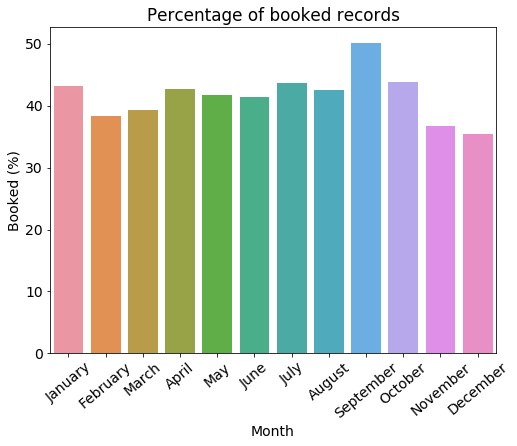

In [64]:
sns.barplot(x=booked_df.index, y=booked_df['booked%']).set_title('Percentage of booked records')
plt.xticks(rotation=40)
plt.xlabel('Month')
plt.ylabel('Booked (%)');

## 2: What months has the highest rental pricing?

We'll compute the the mean of price for each month

In [65]:
cal.groupby('month')['price'].describe().sort_values('mean', ascending=False)['mean']

month
July         173.533978
August       172.843232
October      171.717657
September    171.567089
June         167.377711
November     163.835684
May          161.277425
April        160.161507
December     160.054985
January      152.445511
March        149.735845
February     149.032521
Name: mean, dtype: float64

then we plot it.

In [66]:
sorted_cal = cal.query('available == 1').sort_values(by='date')

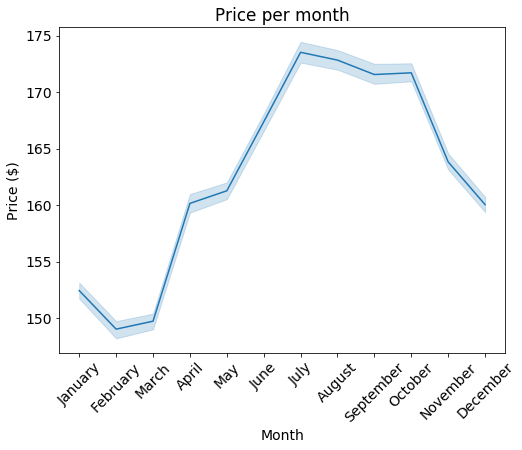

In [67]:
sns.lineplot(data=sorted_cal, x='month', y='price', sort=False).set_title("Price per month")
plt.xticks(rotation=45);
plt.xlabel('Month')
plt.ylabel('Price ($)');

We see that around July, August, October, and September tend to have highest prices.

## 3: What features influence pricing?

In [68]:
coefs_lis = pd.DataFrame()
coefs_lis['abs_coefs'] = abs(lis.corr()['price'])
coefs_lis.sort_values('abs_coefs', ascending=False, inplace=True)
coefs_lis

,abs_coefs
price,1.000000
accommodates,0.479576
bedrooms,0.450777
beds,0.422814
cleaning_fee,0.417955
room_type,0.393001
bathrooms,0.332783
guests_included,0.250212
host_total_listings_count,0.184811
cancellation_policy,0.184521


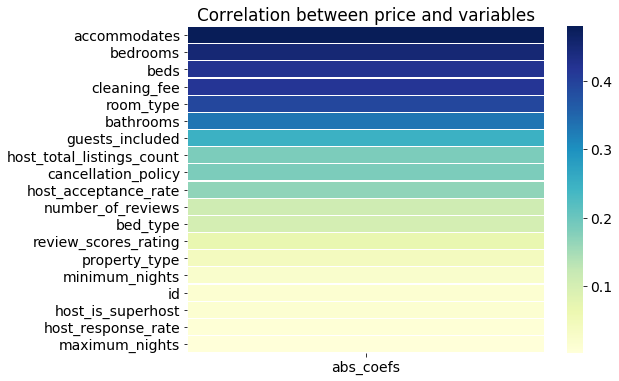

In [69]:
sns.heatmap(coefs_lis.drop('price'), cmap='YlGnBu', linewidths=0.1).set_title("Correlation between price and variables");

From the `ceofs_lis` dataframe and the above graph, we can see that `accommodates` , `bedrooms`, `beds`, `cleaning_fee`, and `room_type` columns tend to affect `price` the most.

## 4: Create a model to predict rental price.

from question number 2, we will pick the columns that affects the pricing the most and use them as inputs to our model.

### Modeling

We start by spliting the data into an X matrix and a response vector y

In [70]:
X = lis[['bathrooms', 'room_type', 'cleaning_fee', 'beds', 'bedrooms', 'accommodates']]

y = lis['price']

Then we create training and test sets

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

then instantiate the model and fit it to the training data

In [72]:
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

now we predict teh response using the testing data

In [73]:
y_pred = lm_model.predict(X_test)

### Evaluation

we first will use teh R2 score

In [74]:
r2_score(y_test, y_pred)

0.4415916116021561

we see that the score is around 0.44 which is not a good score, I think the small volum of available data is the biggest reason for that score

then will use the cross_val_score to make sure the evaluation will not be affected by the splitting.

In [75]:
scores = cross_val_score(lm_model, X, y, cv=7)
scores.mean()

0.32331378324674354

We see that this score is much lower than the R2 score.

# Conclusion

#### To conclude the answers of the questions:
Q1: What time of the year has the most bookings?  
Answer: September has more than 50% of the recoreds booked.    
Q2: What months has the highest rental pricing?  
Answer: July, August, October, and September.  
Q3: What features influence pricing?  
Answer: accommodates, number of bedrooms, number of beds, and cleaning fee